In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

In [38]:

# Probiert hier unterschiedliche Werte
# für die c-Variablen, die die Punktewolken in 
# verschiedene Ecken schieben, aus!
# Wie wirken sie sich auf das Training aus?

c11 = 0 
c12 = 3
c21 = 5 
c22 = 4

s1 = np.random.randn(20, 2) + [c11, c12]
s2 = np.random.randn(20, 2) + [c21, c22]

In [39]:
X = np.r_[s1,s2 ]

In [40]:
Y = [-1] * 20 + [1] * 20

In [41]:
print(X[0])

[-0.67981435  3.35506361]


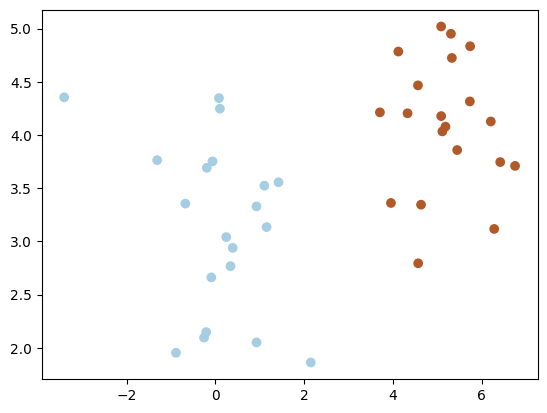

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=Y,cmap=plt.cm.Paired)

# Training des Perzeptrons 

In [64]:
# Hier den Trainingsalgorithmus des Perceptrons (siehe Folien) implementieren
def train(D: tuple[list[float, float], int], MaxIter: int):
    w = np.zeros(2)
    b = 0
    for i in range(MaxIter):
        for (x, y) in D:
           a = np.dot(w, x) + b
           if y * a <= 0:
               w = w + y * x
               b = b + y
    return w, b

D = list(zip(X, Y))
shuffle(D)
w, b = train(D, 100)

In [65]:
w

array([10.54691844, -2.02550682])

In [66]:
b

-20

# Decision Boundary


In [67]:
# 
# Auf der decision boundary liegen die Punkte,
# die eine Aktivierung von 0 haben (a = 0) 
# diese Gerade markiert die "Grenze" zwischen
# den beiden Klassen (also die Punkte, die keiner Klasse
# zugeordnet werden können)
# 
# der folgende Code plottet die decision boundary
# für unser gelerntes Perzeptron

In [68]:
# die decision boundary steht senkrecht zum Gewichtsvektor 
# ihr Anstieg kann so berechnet werden: 
#anstieg_w = w[1]/w[0]
# https://www.thomascountz.com/2018/04/13/calculate-decision-boundary-of-perceptron
anstieg_boundary = (-b/w[1])/(b/w[0])
y_intercept_boundary = (0,-b/w[0])


In [69]:
anstieg_boundary

5.207051552004826

In [70]:
xx = np.linspace(-4, 6)
yy = (xx*anstieg_boundary)+(-b/w[1])

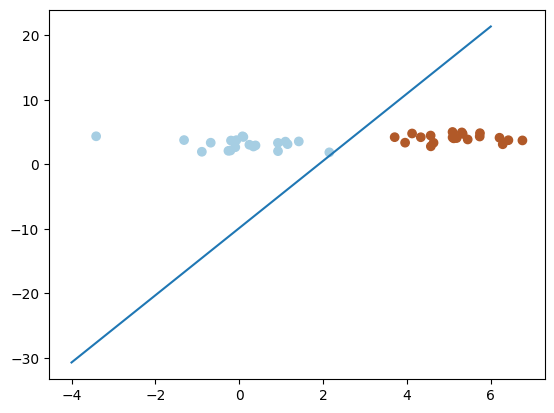

In [71]:
plt.scatter(X[:, 0], X[:, 1], c=Y,cmap=plt.cm.Paired)
plt.plot(xx,yy)

In [72]:
# Lernt das Perzeptron eine gute decision boundary?
# Probiert das für verschiedene Werte der c-Variablen?

**Lernt das Perzeptron die Entscheidungsgrenze?**:
Ja, das Perzeptron lernt eine ausreichend gute Entscheidungsgrenze, um die Daten zu trennen.
Die Linie verläuft zwar nicht mit der größtmöglichen Entfernung zwischen den beiden Klassen, aber sie trennt die Daten erfolgreich.

**probiert das für verschiedene Werte der c-Variablen?**:
Selbst wenn wir die c-Variablen ändern, lernt das Perzeptron immer noch eine Entscheidungsgrenze, die die Daten trennt.
Solange die Datenwolken nicht ineinander liegen, kann das Perzeptron eine Entscheidungsgrenze finden.